In [1]:
import pandas as pd

data = pd.read_csv('data_baru.csv', sep=',')
#data.head()

data['class'].value_counts()

heavy     2105
medium    2095
light     2095
Name: class, dtype: int64

In [2]:
# Divide by class
data_light = data[data['class'] == 'light']
data_medium = data[data['class'] == 'medium']
data_heavy = data[data['class'] == 'heavy']

In [3]:
data_light = data_light.sample(500)
data_medium = data_medium.sample(500)
data_heavy = data_heavy.sample(500)

data_baru = pd.concat([data_light, data_medium, data_heavy], axis=0)
data_baru.head()

filename  class
1758  cctv052x2004080607x01847_31.jpg  light
1906  cctv052x2004080519x01685_23.jpg  light
819   cctv052x2004080609x01859_35.jpg  light
463   cctv052x2004080610x01884_46.jpg  light
1928  cctv052x2004080519x01685_45.jpg  light

In [4]:
#height = 100
#width = 160

from skimage import io
import numpy as np

n_images = data_baru.shape[0]
labels = np.zeros(n_images)
i = 0
all_images = []
for index, row in data_baru.iterrows():
    img = io.imread('fotoframe/'+row['filename'], as_gray=True)
    img = img[67:167, 148:308]
    img = img.reshape([100, 160, 1])
    all_images.append(img)
    if row['class'] == 'light': labels[i] = 0
    elif row['class'] == 'medium': labels[i] = 1
    else: labels[i] = 2
    i = i + 1

x_data = np.array(all_images)
y_data = labels

print(x_data.shape)
print(y_data)
# all_images = []
# for image_path in os.listdir(path):
#     img = io.imread(image_path , as_grey=True)
#     img = img.reshape([WIDTH, HEIGHT, 1])
#     all_images.append(img)
# x_train = np.array(all_images)

(300, 100, 160, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [5]:
# split data
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42)

In [6]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
# print(keras.__version__)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 1
num_classes = 3
epochs = 10

# input image dimensions
img_rows, img_cols = 100, 160

input_shape = (img_rows, img_cols, 1)

Using plaidml.keras.backend backend.


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(100,160,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

INFO:plaidml:Opening device "opencl_amd_baffin.0"


In [9]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [11]:
#train the model
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 8s 32ms/step - loss: 1.0750 - acc: 0.3208 - val_loss: 0.9605 - val_acc: 0.5667
Epoch 2/10
240/240 [==============================] - 3s 13ms/step - loss: 0.7597 - acc: 0.6875 - val_loss: 0.5539 - val_acc: 0.8000
Epoch 3/10
240/240 [==============================] - 3s 12ms/step - loss: 0.3418 - acc: 0.9000 - val_loss: 0.4016 - val_acc: 0.8667
Epoch 4/10
240/240 [==============================] - 3s 13ms/step - loss: 0.2131 - acc: 0.9375 - val_loss: 0.2901 - val_acc: 0.8667
Epoch 5/10
240/240 [==============================] - 3s 13ms/step - loss: 0.1877 - acc: 0.9125 - val_loss: 0.2897 - val_acc: 0.8667
Epoch 6/10
240/240 [==============================] - 3s 13ms/step - loss: 0.1104 - acc: 0.9500 - val_loss: 0.2562 - val_acc: 0.9000
Epoch 7/10
240/240 [==============================] - 3s 13ms/step - loss: 0.0633 - acc: 0.9917 - val_loss: 0.4132 - val_acc: 0.8667
Epoch 8/10
240/240 [====

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3386393924554189
Test accuracy: 0.8833333651224772


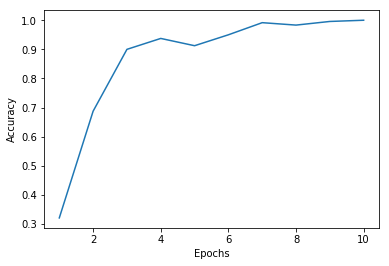

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()